# Logistic Regression Project

In this project we'll be working with a set of fake advertising data, indicating whether or not a specific Internet user has clicked on an advertisement. We'll try to create a model that predicts whether or not an ad will be clicked on based on that user's data.

This dataset contains the following resources:

* 'Daily Time Spent on Site': time spent on site in minutes.
* 'Age': consumer's age.
* 'Area Income': Average consumer's income on region.
* 'Daily Internet Usage': Average minutes per day consumer used on internet.
* 'Linha do tópico do anúncio': Ad title.
* 'City': consumer's city.
* 'Male': consumer's genre is male or not.
* 'Country': consumer's country.
* 'Timestamp': time at which the consumer clicked on the ad or closed window.
* 'Clicked on Ad'': 0 or 1 indicate if clicked or not on the ad.

## Import libraries

** Import some libraries you think you'll need **

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read data
** Read the file advertising.csv and record it on a DataFrame called ad_data. **

In [2]:
ad_data = pd.read_csv('advertising.csv')

** Check ad_data heading **

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info() e describe() on ad_data **

In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [5]:
# It was identified that Timestamp is an object type. You may need to convert it to a date
ad_data['Timestamp'] = pd.to_datetime(ad_data['Timestamp'])

In [6]:
# check if Timestamp was converted to datetime
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 78.3+ KB


In [7]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,2016-04-10 10:34:06.636000256,0.50000
min,32.600000,19.000000,13996.500000,104.780000,0.000000,2016-01-01 02:52:10,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,2016-02-18 02:55:42,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,2016-04-07 17:27:29.500000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,2016-05-31 03:18:14,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,2016-07-24 00:22:16,1.00000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,NaN,0.50025


## Exploratory Data Analysis

Let's use Seaborn to explore the data!

Try to recreate the plots below.

** Create a histogram of "Age" **

<Axes: >

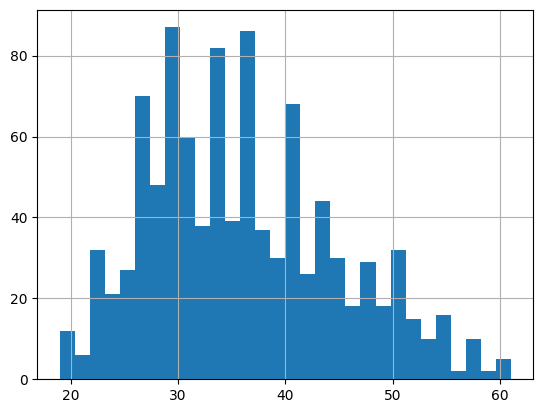

In [8]:
ad_data['Age'].hist(bins=30)

** Create joint plot showing "Area Income" versus "Age" **

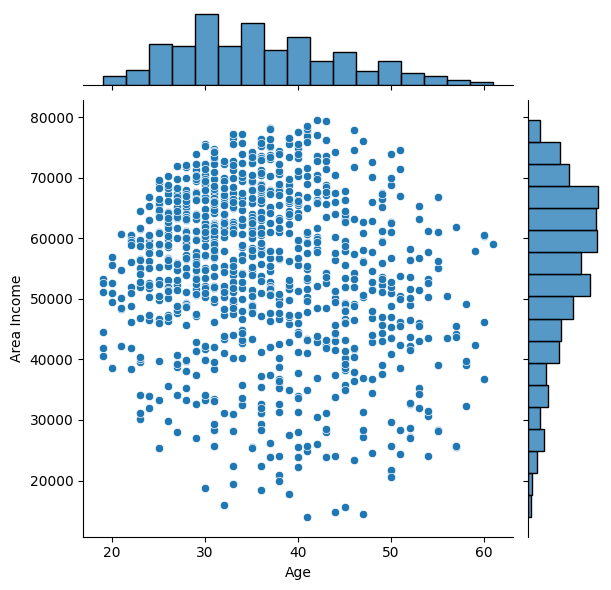

In [9]:
sns.jointplot(x='Age', y='Area Income', data=ad_data)
# There is a concentration of salaries above 50,000 in the 20 to just over 40 age group, but 
# there is no linear relationship.

** Create a joint plot showing the KDE distributions of “Daily Time spent” on the site vs “Age”. **

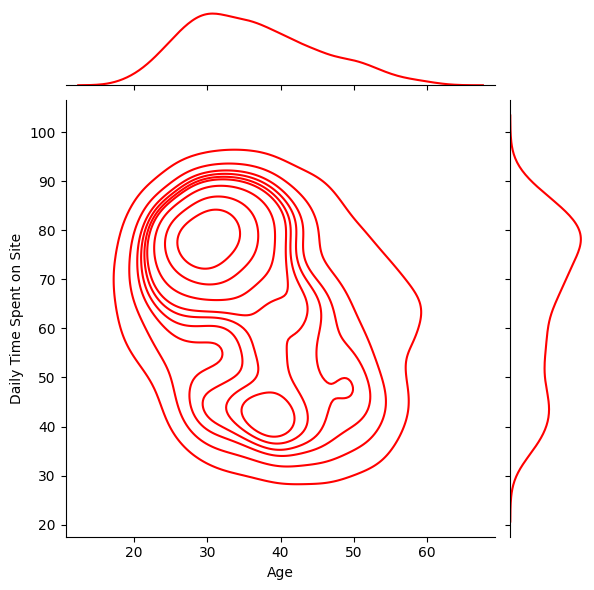

In [10]:
sns.jointplot(x='Age', y='Daily Time Spent on Site', data=ad_data, color='red', kind='kde')
# There is a linear relationship. The older a person is, the less they tend to spend time on the site.

** Create joint plot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

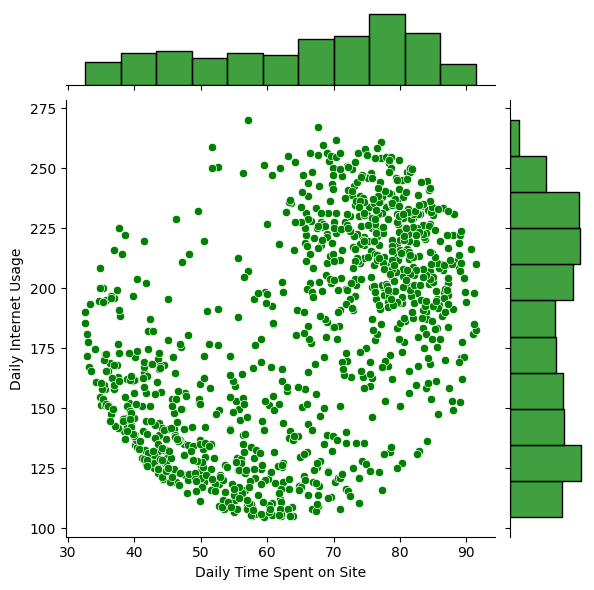

In [11]:
sns.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=ad_data, color='green')
# There is no linear relationship, but you can see two concentrations on the graph.

** Finally, create a pair plot with the 'hue' parameter defined by the 'Clicked on Ad' column. **

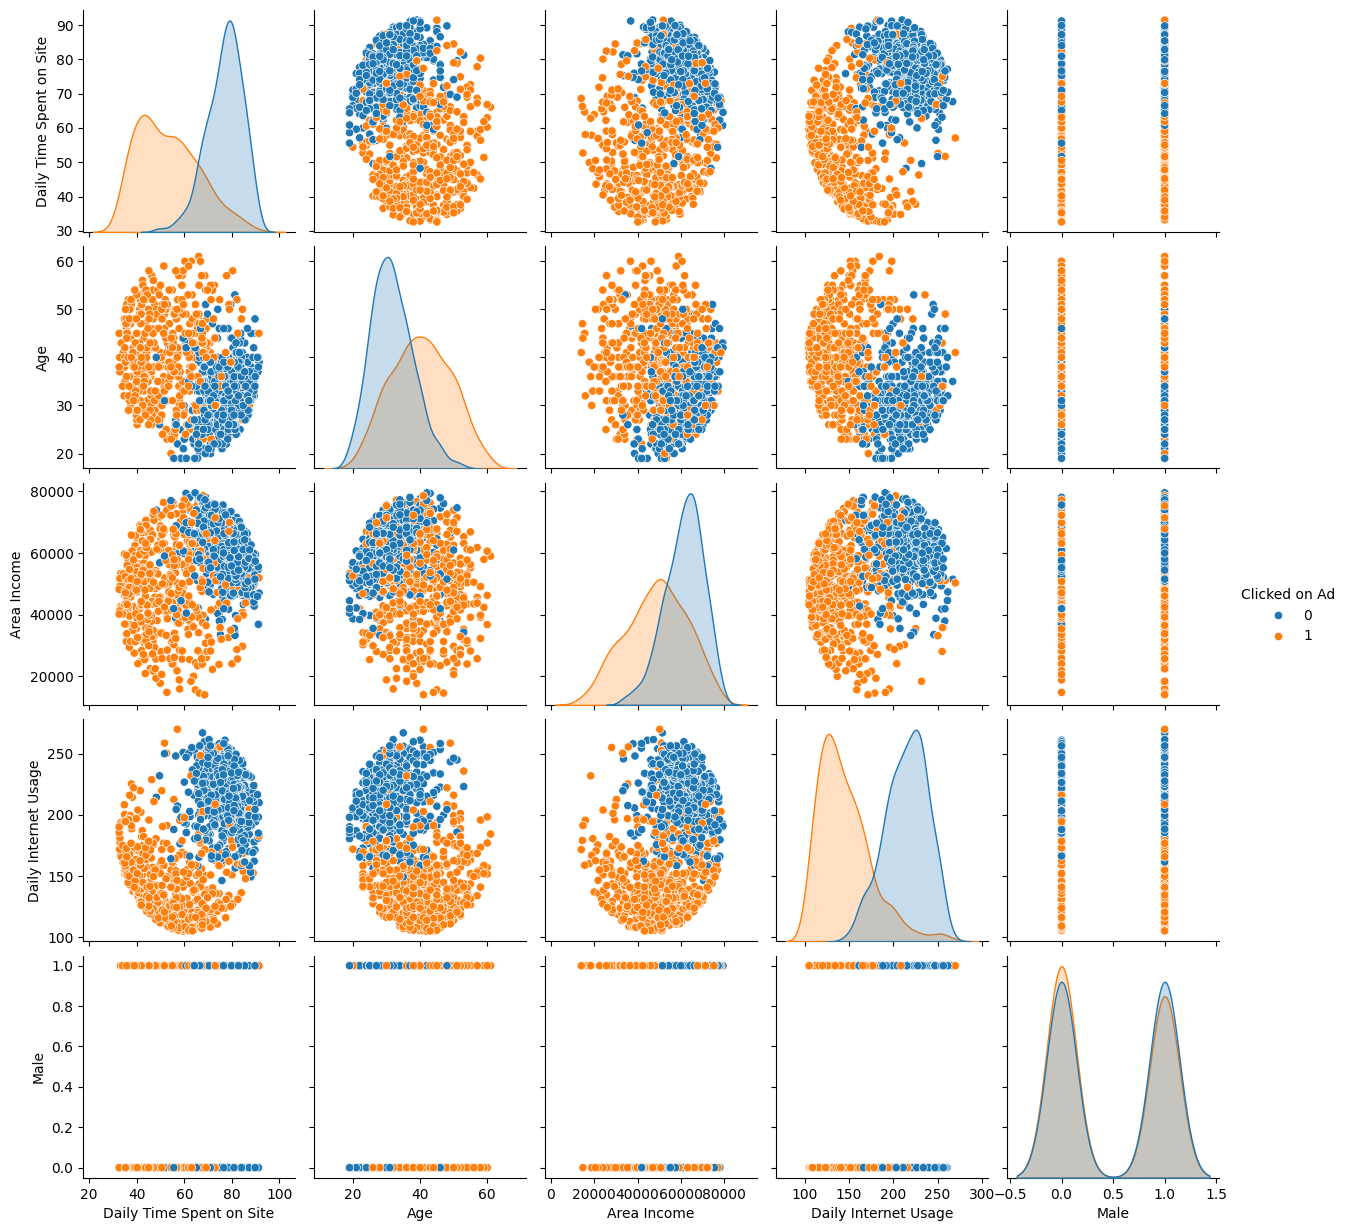

In [12]:
sns.pairplot(ad_data, hue="Clicked on Ad")
# o matiz informado em 'hue' serve para separar os dados entre quem clicou (1) e quem não clicou (0).

# Logistic Regression

Now it's time to break our data down into training and test and look at our model.

You'll have the freedom here to choose which columns you want to train on!

** Split the data into training set and test set using train_test_split **

In [13]:
from sklearn.model_selection import train_test_split
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

** Train and adjust a logistic regression model on the training set. **

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

c:\Users\rocki\OneDrive\Documentos\GitHub\Advertising_data\Ad_data\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
# Calculando as probabilidades
y_prob = logmodel.predict_proba(X_test)[:, 1]  # Probabilidade de y = 1

## Predictions and evaluations
** Now predict values for the test data. **

In [17]:
predictions = logmodel.predict(X_test)

** Create a classification report for the model. **

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [19]:
cm = confusion_matrix(y_test, predictions)
cm
# colunas - o que o modelo diz, linhas - valor real 

array([[155,   7],
       [ 25, 143]])

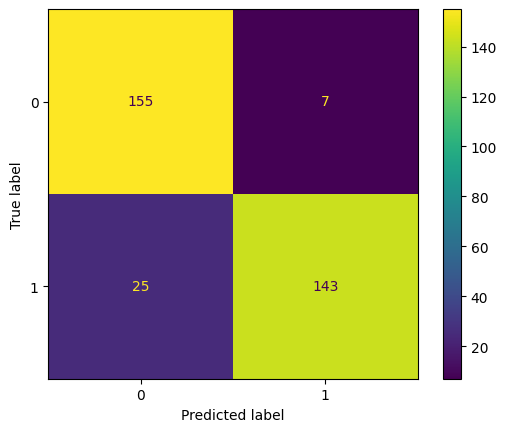

In [20]:
ConfusionMatrixDisplay(confusion_matrix=cm,).plot();

In [21]:
print(classification_report(y_test, predictions))
# f1-score: harmonic mean between precision and recall
# average accuracy of 91%

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       162
           1       0.95      0.85      0.90       168

    accuracy                           0.90       330
   macro avg       0.91      0.90      0.90       330
weighted avg       0.91      0.90      0.90       330



In [22]:
# Package for calculating ROC Curve metrics
from sklearn.metrics import roc_curve 

In [23]:
# Calculate the Sensitivity (True Positive Rate = TPR) and also the “1 - Specificity” metric (False Positive Rate = FPR)
# Remember that to calculate the curve we need the Target (Y Actual) and the probability of the chosen classification model [ Prob (Y = 1) ].

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

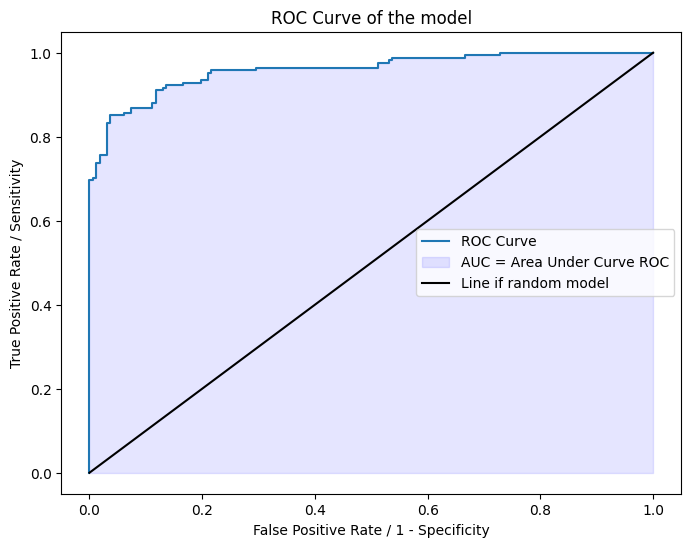

In [24]:
plt.figure(figsize=(8,6))

plt.plot(fpr,tpr, label='ROC Curve')
plt.fill_between(fpr,tpr,color='blue',alpha= 0.1,label = 'AUC = Area Under Curve ROC')
plt.plot(np.linspace(0,1,100),np.linspace(0,1,100),color='black',label='Line if random model')

plt.title("ROC Curve of the model")
plt.ylabel('True Positive Rate / Sensitivity')
plt.xlabel('False Positive Rate / 1 - Specificity')
plt.legend();

In [25]:
from sklearn.metrics import roc_auc_score

In [26]:
# Calculate area under curve ROC
roc_auc_score(y_test, y_prob)

np.float64(0.958774250440917)

In [27]:
from scipy import stats

In [28]:
ks_data = pd.DataFrame({
    'y_test': y_test,
    'y_prob': y_prob
})


In [29]:
# Split the probabilities according to the real value of y_test
prob_y_real_0 = ks_data.loc[ks_data['y_test'] == 0, 'y_prob']
prob_y_real_1 = ks_data.loc[ks_data['y_test'] == 1, 'y_prob']


In [30]:
# Calculate the cumulative distributions and the KS.
from scipy.stats import ks_2samp

# Calculate KS and P-value
ks_stat, ks_p_value = ks_2samp(prob_y_real_1, prob_y_real_0)

print(f"KS Statistic: {ks_stat:.4f}")
print(f"p-value: {ks_p_value:.4f}")

KS Statistic: 0.8142
p-value: 0.0000
